<a href="https://colab.research.google.com/github/carlosvvieira/Phyton1/blob/main/linear_regression_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [ ]:
from sklearn import datasets

### **Load dataset**

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

### **Description of the Diabetes dataset**

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### **Feature names**

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [ ]:
X = diabetes.data
Y = diabetes.target

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [ ]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [1]:
import pandas as pd

### **Download CSV from GitHub**

In [2]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2021-03-20 18:04:58--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2021-03-20 18:04:58--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.003s  

2021-03-20 18:04:59 (11.5 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [3]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [4]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [5]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [6]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [8]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [10]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [13]:
model = linear_model.LinearRegression()

#### Build training model

In [14]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Apply trained model to make prediction (on test set)

In [15]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [16]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.30889456e-01  5.21003190e-02  5.87315608e-02  3.15007928e+00
 -1.97350851e+01  3.73102317e+00  1.62405829e-03 -1.54329519e+00
  3.24000225e-01 -1.18807895e-02 -9.50027841e-01  7.79865246e-03
 -5.64885973e-01]
Intercept: 38.60414860372601
Mean squared error (MSE): 18.59
Coefficient of determination (R^2): 0.76


medv = -1.19* (crim) + 4.98*(zn) + 1.94 * (indus)+......+41.64

### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [17]:
r2_score(Y_test, Y_pred)

0.7561961357187165

In [18]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [19]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [20]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [21]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [22]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [23]:
Y_test

386    10.5
3      33.4
104    20.1
361    19.9
453    17.8
       ... 
362    20.8
164    22.7
10     15.0
403     8.3
87     22.2
Name: medv, Length: 102, dtype: float64

In [24]:
import numpy as np
np.array(Y_test)

array([10.5, 33.4, 20.1, 19.9, 17.8, 13.3, 19.3,  7.2, 19.6, 19.3, 15.7,
       21.9, 25. , 16.7, 24.1, 24.4, 22.4, 34.9, 23.3, 22.4, 23.7, 34.6,
       17.4, 24.4, 28. , 19.4, 23.5, 15.6, 16.2, 10.2, 11.7, 18.7, 33.1,
       23.1, 13.1, 12.7, 11.9, 20.6, 28.1, 26.6, 18.2, 21.9, 20.1, 13.8,
       21.1, 19.8, 31.5, 16.8, 21.6,  8.4, 24.3, 18.6, 50. , 37.2, 33.1,
       29.8, 21. , 50. , 21.4, 16.5,  8.4, 23.7, 38.7, 18.7, 22. , 22.5,
       13.6, 17.5,  7. , 14.5, 21.1, 21.2, 20.8, 19.2, 29. , 24.5, 22.5,
       50. , 41.7, 11.7, 21.4, 20.5,  8.3, 11.5, 20.1, 30.3,  6.3, 27.1,
       29.4, 27.9, 15.2, 19.7, 32.4, 11.8, 13.8, 23. , 20.4, 20.8, 22.7,
       15. ,  8.3, 22.2])

In [25]:
Y_pred

array([ 5.70768901, 28.50335765, 21.54504666, 19.28861857, 22.62389482,
       16.46955227, 20.35306044,  9.71172177, 18.26651496, 21.07791069,
       14.65150983, 16.20373943, 26.0197415 , 20.90911038, 20.60129628,
       24.33873761, 23.5985679 , 30.48478636, 25.63764843, 23.14188387,
       27.95127185, 34.89321544, 17.36781947, 23.91358205, 28.61169511,
       19.74024295, 30.85838659, 13.70055957, 20.53897512, 17.33293591,
       15.69217615, 17.78018723, 33.14154487, 20.57331191, 13.82801531,
       18.14238097, 22.52768976, 27.55609542, 25.35075159, 28.05659305,
       19.2426945 , 38.59583754, 23.74625858, 16.91623595, 22.28017578,
       21.49268121, 32.84739026, 20.41826496, 25.70108671,  4.74269528,
       29.7156642 , 16.84972386, 43.1471862 , 32.8985185 , 35.66940412,
       26.19320022, 23.12410524, 35.79471132, 22.30246182, 10.7269161 ,
       14.97253909, 28.6327754 , 35.7964002 , 20.66228755, 27.42781844,
       21.96856784, 14.38903658, 16.27345014, -5.06135788, 19.04

#### Making the scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


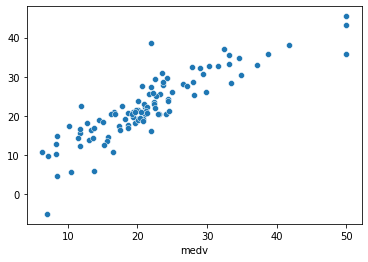

In [26]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


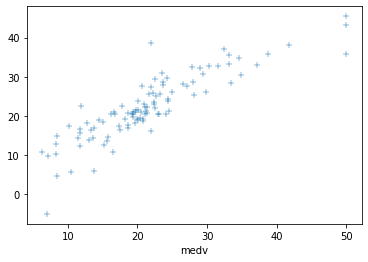

In [27]:
sns.scatterplot(Y_test, Y_pred, marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


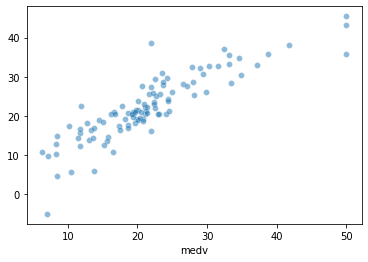

In [28]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)